# Mintun1984Model for Image-Derived Input Functions and Twilite Data

## Setup

In [18]:
# system functions that are always useful to have
import time, sys, os
from pprint import pprint

# basic numeric setup
import numpy as np

from Boxcar import Boxcar
from RadialArtery import RadialArtery
from Mintun1984Model import Mintun1984Model

In [19]:
# define data & models
petdir = os.path.join(os.getenv("SINGULARITY_HOME"), "CCIR_01211", "derivatives", "sub-108293", "ses-20210421150523", "pet")
idif = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif_dynesty-Boxcar-ideal.nii.gz")
#idif = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-MipIdif_idif.nii.gz")
#twil = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc.nii.gz")
twil = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal.nii.gz")
kern = os.path.join(petdir, "kernel_hct=46.8.nii.gz")
pet = os.path.join(petdir, "sub-108293_ses-20210421150523_trc-oo_proc-delay0-BrainMoCo2-createNiftiMovingAvgFrames_timeAppend-4-ParcSchaeffer-reshape-to-schaeffer-schaeffer.nii.gz")

# most reasonable fit from:  truths=[0.5, 0.245, 0.775, 5.6, -15, 0.05]
mm_twil = Mintun1984Model(twil, 
                     pet,
                     truths=[0.47, 0.27, 0.886, 6.742, -14, 0.024],
                     nlive=100,
                     tag="main7-rc1p85-vrc1-3000")
mm_idif = Mintun1984Model(idif, 
                     pet,
                     truths=[0.412, 0.978, 0.978, 14.834, -11, 0.025],
                     nlive=100,
                     tag="main7-rc1p85-vrc1-3000")

parc_index = 25

RadialArtery: found data for tracer oo
{'fqfp': '/Users/jjlee/Singularity/CCIR_01211/derivatives/sub-108293/ses-20210421150523/pet/sub-108293_ses-20210421150523_trc-oo_proc-TwiliteKit-do-make-input-func-nomodel_inputfunc_dynesty-RadialArtery-ideal',
 'halflife': 122.2416,
 'img': array([      0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,    2156.45688651,   60882.2487606 ,
        384873.94174831, 1025136.43642092, 1276644.63555956,
        724229.93859038,  160029.58429176,   22122.61209334,
         34167.48384583,  100338.05776186,  229709.13430143,
        397103.20549311,  550162.50793083,  641741.149352  ,
        652406.78996981,  592459.2152483 ,  4896

## Test main7

In [20]:
# os.chdir("/Users/jjlee/PycharmProjects/dynesty/idif2024")
# os.getcwd()

In [21]:
import subprocess

# 3 parcels ->  extra-cerebral head, bone, air
# completed_process = subprocess.run(["python3", "main7.py", "twil", pet, "3", "100", "1"], 
#                capture_output=True, text=True)

In [22]:
# pprint(completed_process)

In [23]:
# pprint(completed_process.stdout)

In [24]:
# pprint(completed_process.stderr)

## Inspect Mintun1984Model twil

In [25]:
v = mm_twil.truths
pprint("===================================== v ======================================")
pprint(v)

data = mm_twil.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[0.47, 0.27, 0.886, 6.742, -14, 0.024]
'==================================== data ===================================='
{'halflife': 122.2416,
 'inputFuncInterp': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.03994571,
        1.12776882,  7.12931669, 18.98939241, 23.64827266, 13.41546941,
        2.96435134,  0.4097942 ,  0.63291064,  1.85863919,  4.25507936,
        7.35584877, 10.19108421, 11.88746598, 12.08503386, 10.97457873,
        9.07062294,  6.93271141,  4.97893413,  3.42628487,  2.3219736 ,
        1.61053033,  1.1962373 ,  0.98380767,  0.89709523,  0.88289232,
        0.90739983,  0.95061462,  1.00128142,  1.05325537,  1.10321277,
        1.14934311,  1.19065321,  1.

In [26]:
pprint("============================== mm_twil.data2t(data) ===============================")
pprint(mm_twil.data2t(data))
pprint("============================= mm_twil.data2taus(data) =============================")
pprint(mm_twil.data2taus(data))
pprint("=========================== mm_twil.data2timesMid(data) ===========================")
pprint(mm_twil.data2timesMid(data))
pprint("================================== mm_twil.fqfp ===================================")
pprint(mm_twil.fqfp)
pprint("========================== mm_twil.input_function() =========================")
pprint(mm_twil.input_function())
pprint("================================= mm_twil.labels ==================================")
pprint(mm_twil.labels)
pprint("====================== mm_twil.load_nii(mm_twil.fqfp + '.nii.gz') ======================")
pprint(mm_twil.load_nii(mm_twil.fqfp + ".nii.gz"))
pprint("=============================== mm_twil.loglike(v) ================================")
pprint(mm_twil.loglike(v))
pprint("================================== mm_twil.ndim ===================================")
pprint(mm_twil.ndim)
pprint("========================= mm_twil.parse_halflife(mm_twil.fqfp) =========================")
pprint(mm_twil.parse_halflife(mm_twil.fqfp))
pprint("========================= mm_twil.parse_isotope(mm_twil.fqfp) ==========================")
pprint(mm_twil.parse_isotope(mm_twil.fqfp))
pprint("================================== mm_twil.sigma ==================================")
pprint(mm_twil.sigma)
pprint("============================ mm_twil.signalmodel(data) ============================")
pprint(mm_twil.signalmodel(data))

('============================== mm_twil.data2t(data) '
 '===============================')
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89.])
('============================= mm_twil.data2taus(data) '
 '=============================')
array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 20., 20.])
('=========================== mm_twil.data2timesMid(data) '
 '===========================')
array([ 5.,  6.,  7.,  8.,  9., 10., 11., 

## Plot Mintun1984Model twil

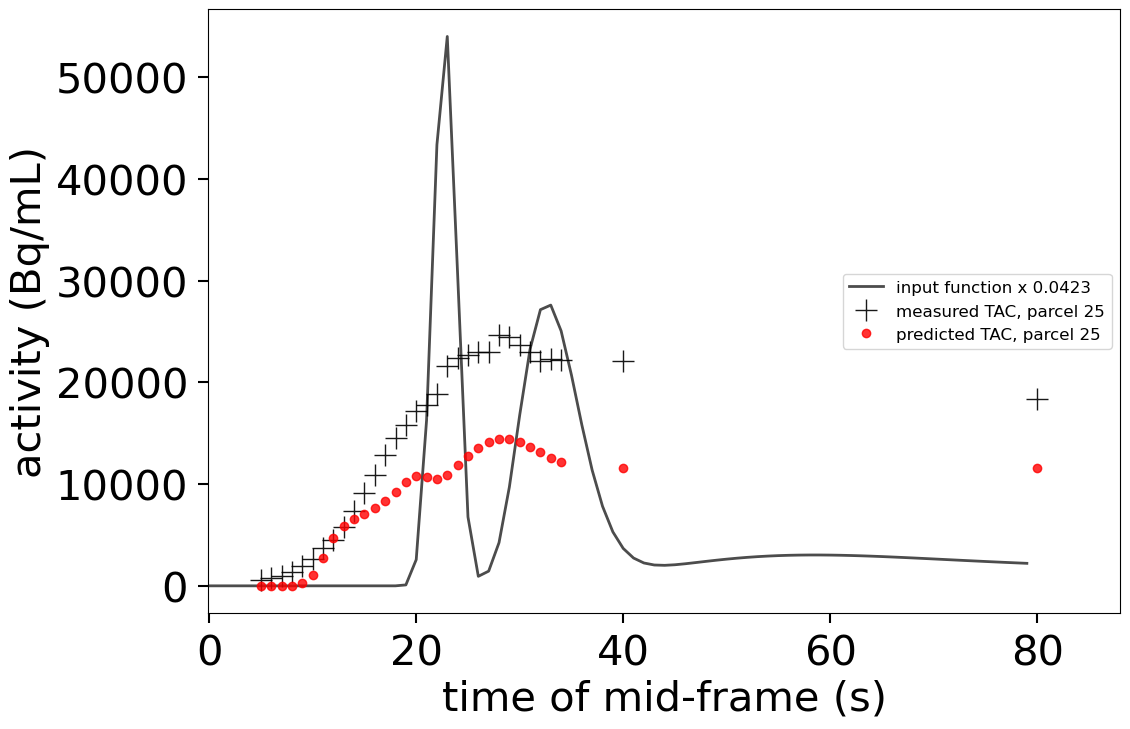

In [27]:
mm_twil.plot_truths(parc_index=parc_index)

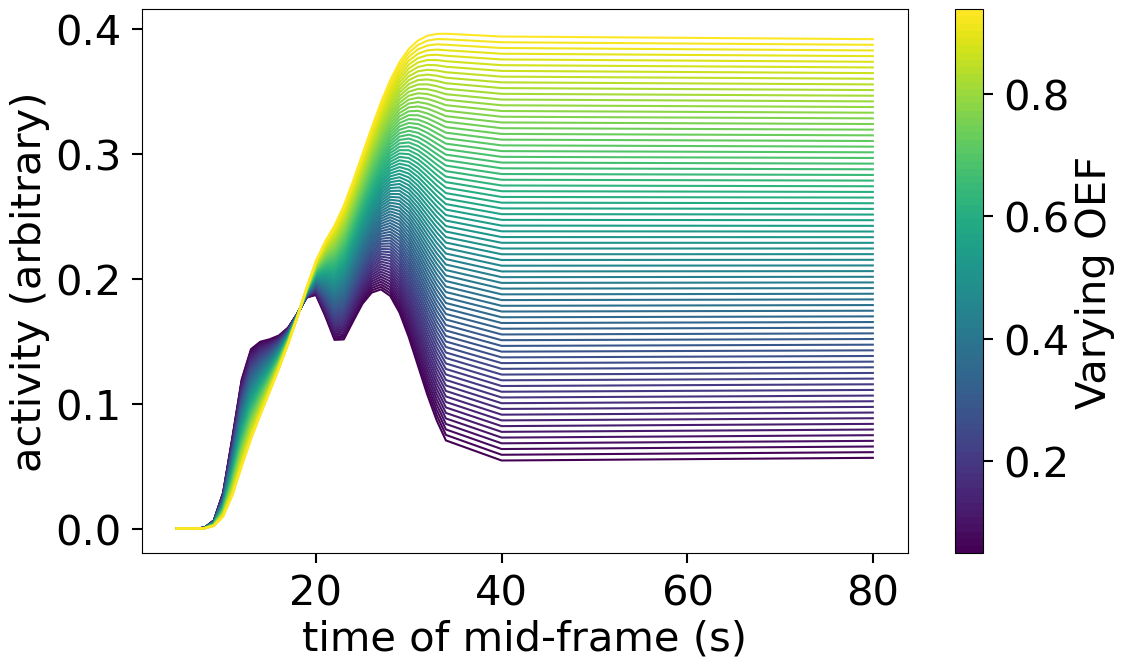

In [28]:
mm_twil.plot_variations(0, 0.05, 0.95, mm_twil.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

iter: 12881 | batch: 19 | bound: 14 | nc: 1 | ncall: 629195 | eff(%):  2.031 | loglstar: 69.131 < 75.454 < 74.158 | logz: 61.070 +/-  0.124 | stop:  0.952                                            

Parameter 0: 0.481 [0.444, 0.812]
Parameter 1: 0.341 [0.110, 1.002]
Parameter 2: 0.933 [0.682, 0.998]
Parameter 3: 6.899 [0.353, 12.852]
Parameter 4: -14.310 [-26.873, -7.663]
Parameter 5: 0.025 [0.020, 0.034]
Parameter 0: 0.481 [0.444, 0.812]
Parameter 1: 0.341 [0.110, 1.002]
Parameter 2: 0.933 [0.682, 0.998]
Parameter 3: 6.899 [0.353, 12.852]
Parameter 4: -14.310 [-26.873, -7.663]
Parameter 5: 0.025 [0.020, 0.034]


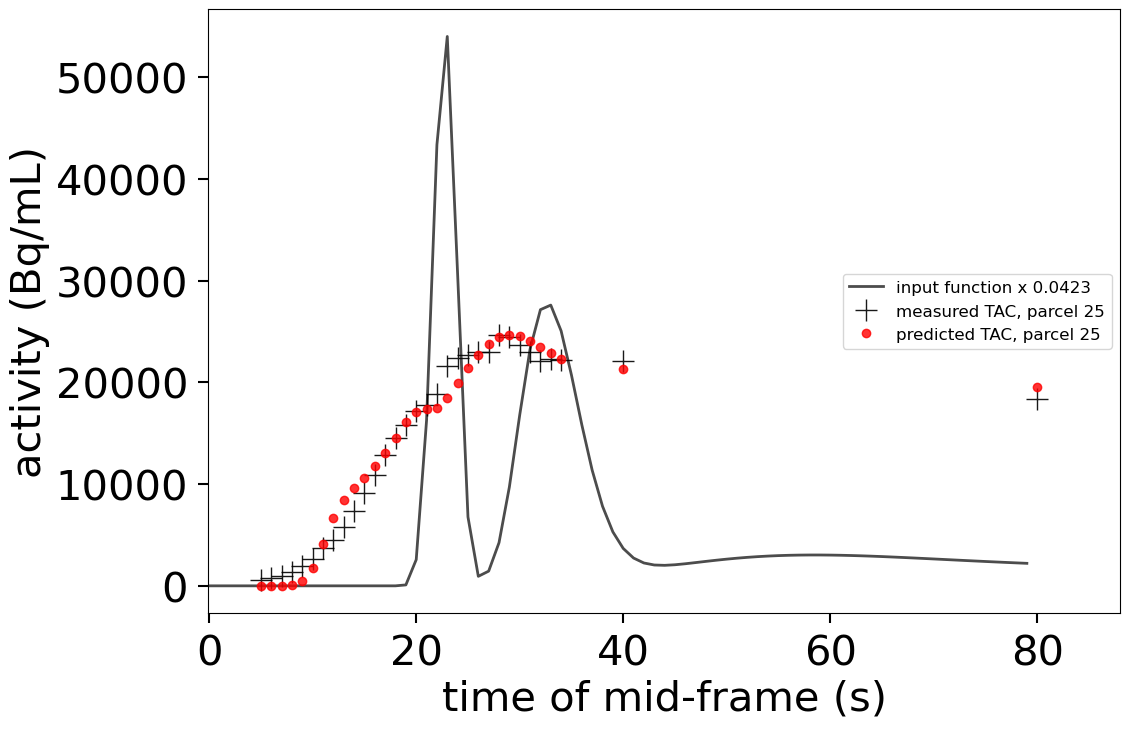

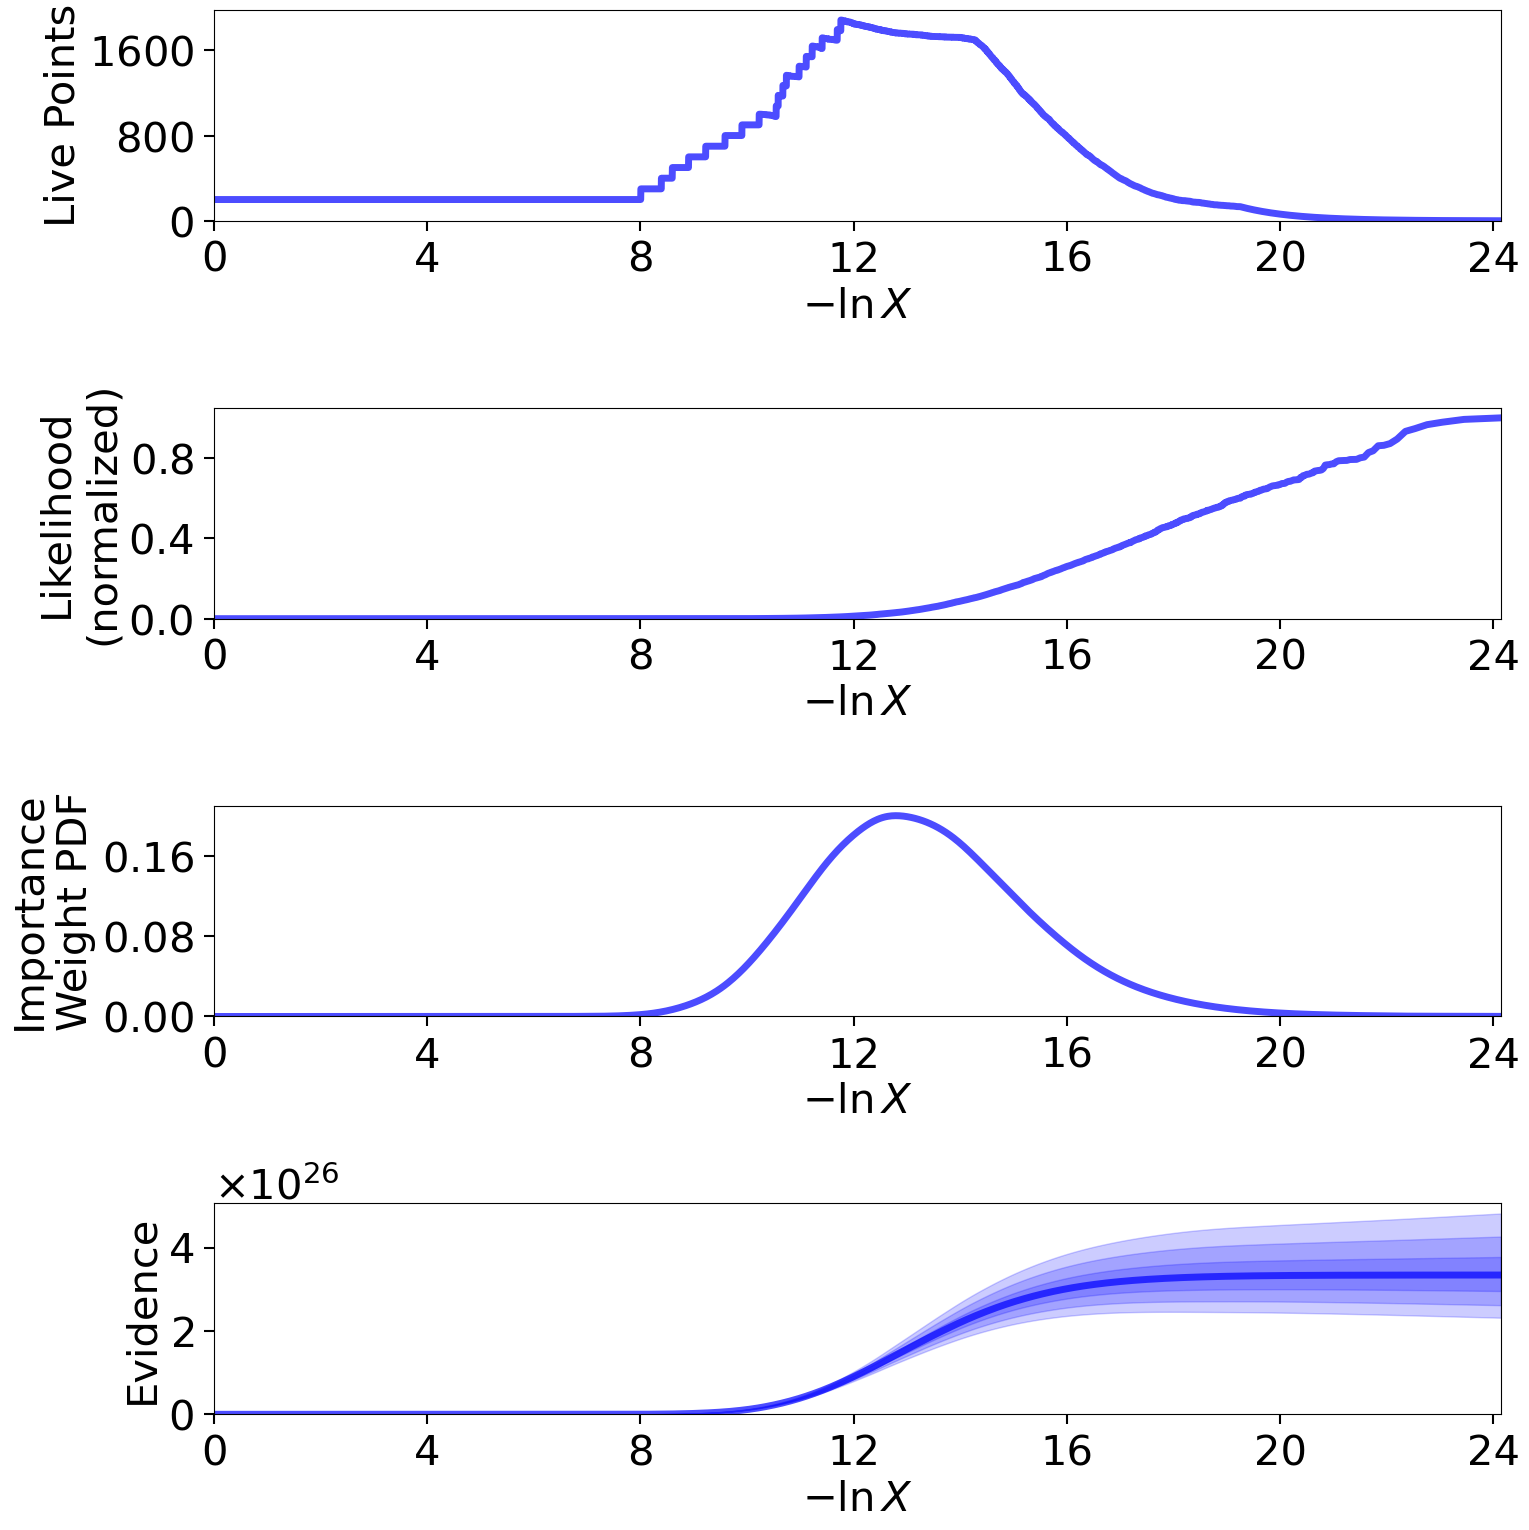

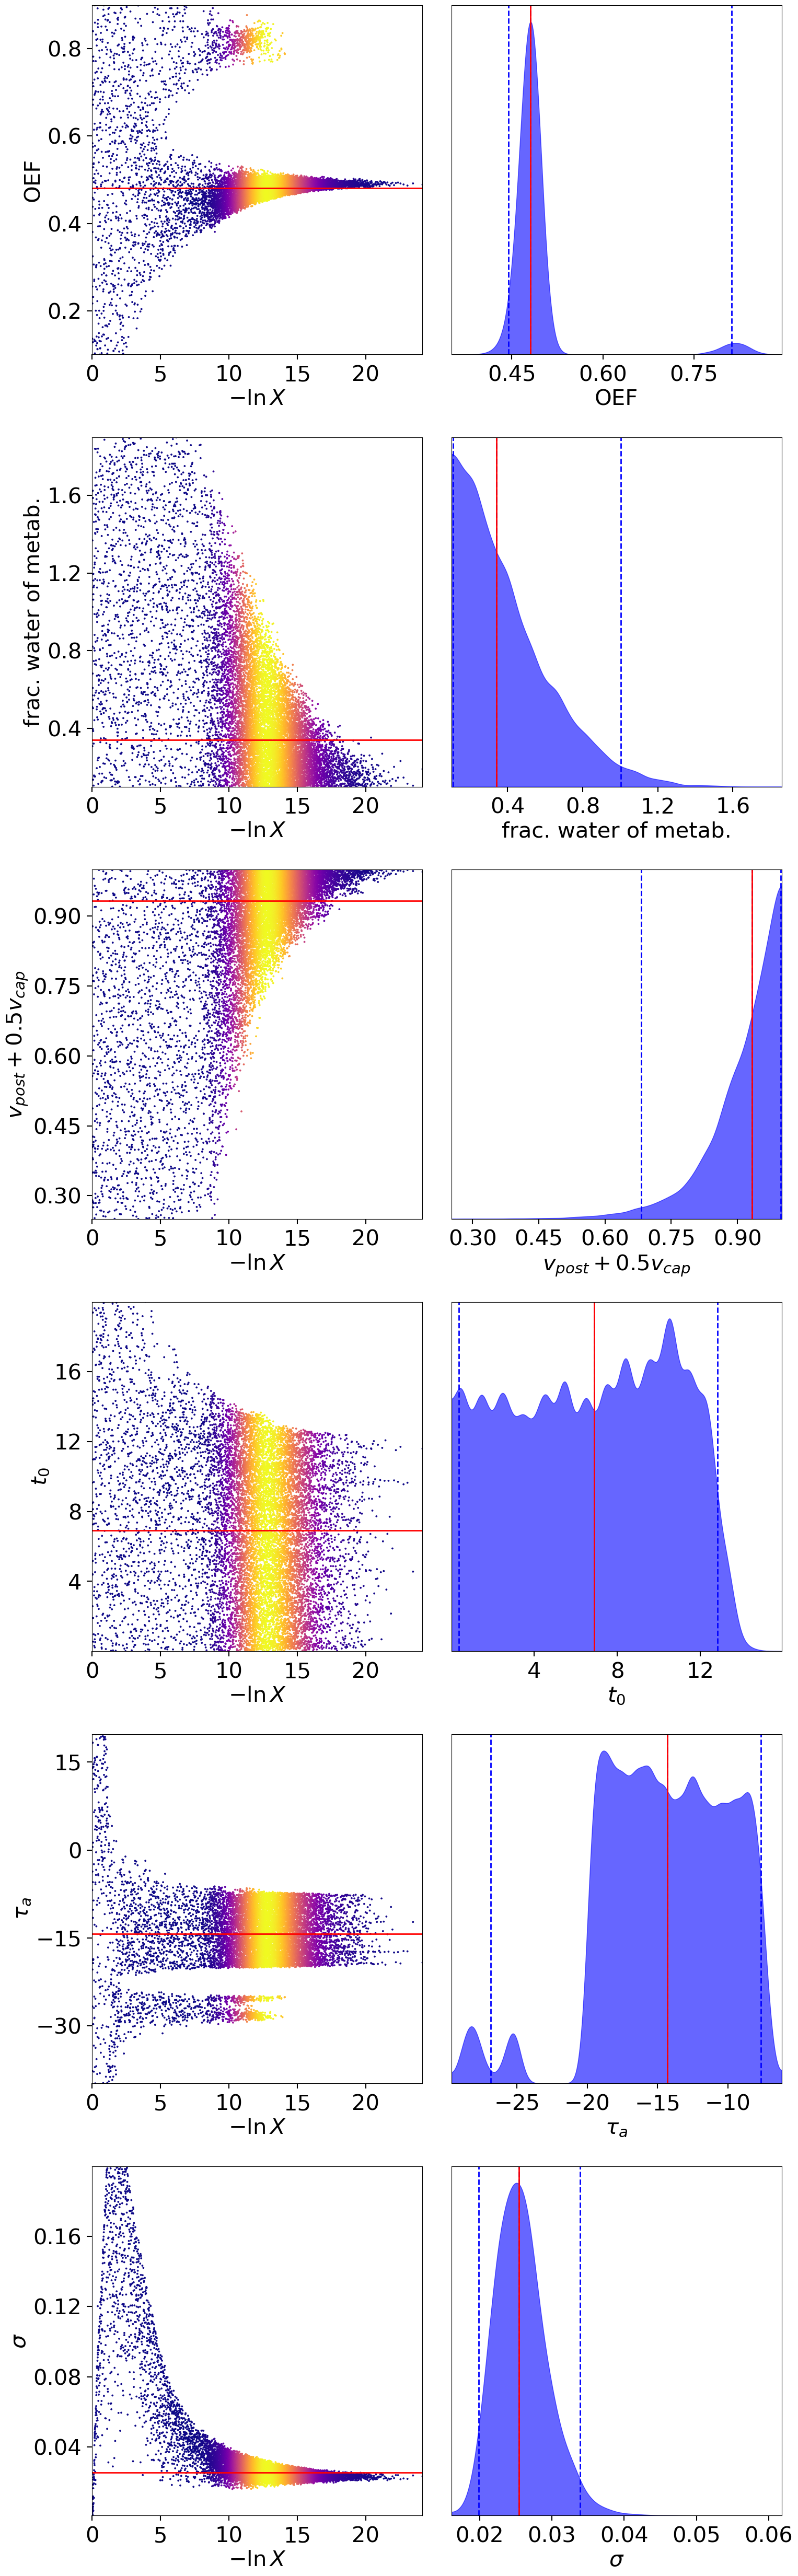

In [29]:
# de novo, thalamus ~ 6, 25
res_twil = mm_twil.run_nested_for_indexed_tac(parc_index, print_progress=True)
mm_twil.save_results(res_twil, "playground-for-M1984M")

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(mm_twil.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results

## Inspect Mintun1984Model idif

In [30]:
v = mm_idif.truths
pprint("===================================== v ======================================")
pprint(v)

data = mm_idif.data(v)
pprint("==================================== data ====================================")
pprint(data)

'===================================== v ======================================'
[0.412, 0.978, 0.978, 14.834, -11, 0.025]
'==================================== data ===================================='
{'halflife': 122.2416,
 'inputFuncInterp': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  3.00652468,  9.00479888, 12.77517547, 13.92668597,
       14.42071018, 14.46584423, 14.14934209, 13.53195874, 12.67027018,
       11.62252172, 10.44875392,  9.20855515,  7.95795564,  7.32302444,
        6.80283603,  5.81378355,  4.90013072,  4.09862517,  3.41955036,
        2.86049752,  2.41165759,  2.05914421,  1.78741595,  1.58103083,
        1.42581783,  1.30954344,  1.2221717 ,  1.15582831,  1.10457696,
        1.06410132,  1.03136281,  1.00428094,  0.98146145,  0.96198167,
        0.94523055,  0.93079601,  0.91838892,  0.90779459,  0.89884295,
        0.89139079,  0.88531202, 

In [31]:
pprint("============================== mm_idif.data2t(data) ===============================")
pprint(mm_idif.data2t(data))
pprint("============================= mm_idif.data2taus(data) =============================")
pprint(mm_idif.data2taus(data))
pprint("=========================== mm_idif.data2timesMid(data) ===========================")
pprint(mm_idif.data2timesMid(data))
pprint("================================== mm_idif.fqfp ===================================")
pprint(mm_idif.fqfp)
pprint("========================== mm_idif.input_function() =========================")
pprint(mm_idif.input_function())
pprint("================================= mm_idif.labels ==================================")
pprint(mm_idif.labels)
pprint("====================== mm_idif.load_nii(mm_idif.fqfp + '.nii.gz') ======================")
pprint(mm_idif.load_nii(mm_idif.fqfp + ".nii.gz"))
pprint("=============================== mm_idif.loglike(v) ================================")
pprint(mm_idif.loglike(v))
pprint("================================== mm_idif.ndim ===================================")
pprint(mm_idif.ndim)
pprint("========================= mm_idif.parse_halflife(mm_idif.fqfp) =========================")
pprint(mm_idif.parse_halflife(mm_idif.fqfp))
pprint("========================= mm_idif.parse_isotope(mm_idif.fqfp) ==========================")
pprint(mm_idif.parse_isotope(mm_idif.fqfp))
pprint("================================== mm_idif.sigma ==================================")
pprint(mm_idif.sigma)
pprint("============================ mm_idif.signalmodel(data) ============================")
pprint(mm_idif.signalmodel(data))

('============================== mm_idif.data2t(data) '
 '===============================')
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89.])
('============================= mm_idif.data2taus(data) '
 '=============================')
array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 20., 20.])
('=========================== mm_idif.data2timesMid(data) '
 '===========================')
array([ 5.,  6.,  7.,  8.,  9., 10., 11., 

## Plot Mintun1984Model idif

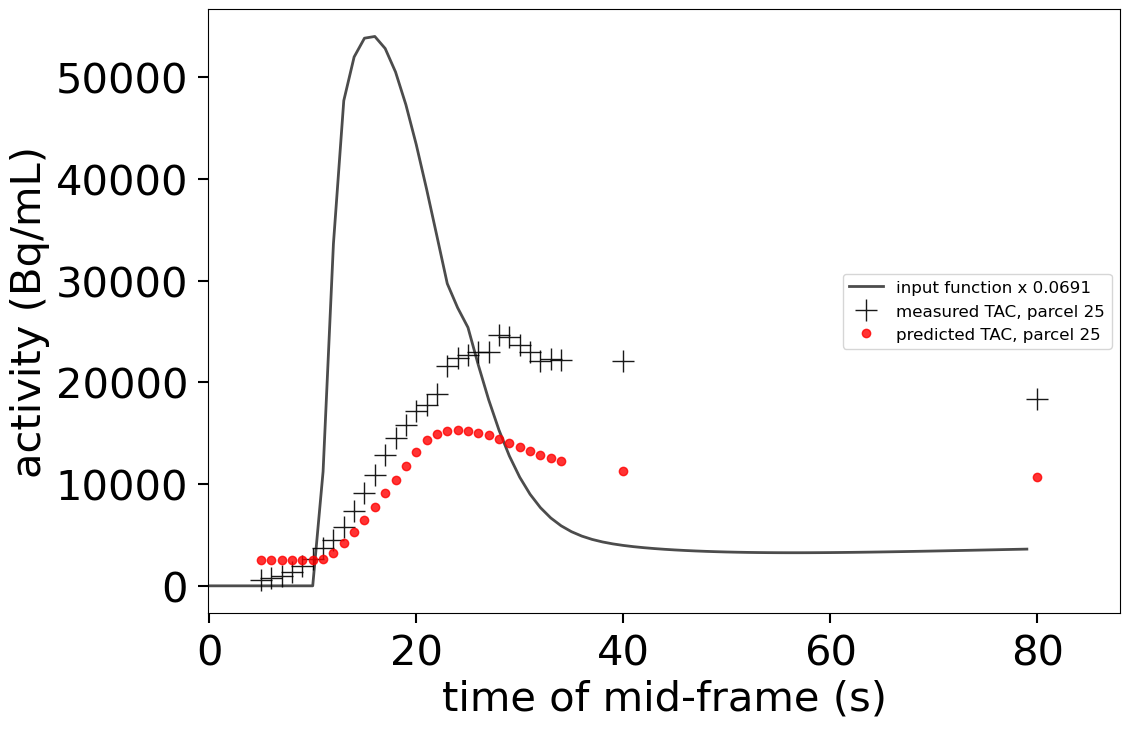

In [32]:
mm_idif.plot_truths(parc_index=parc_index)

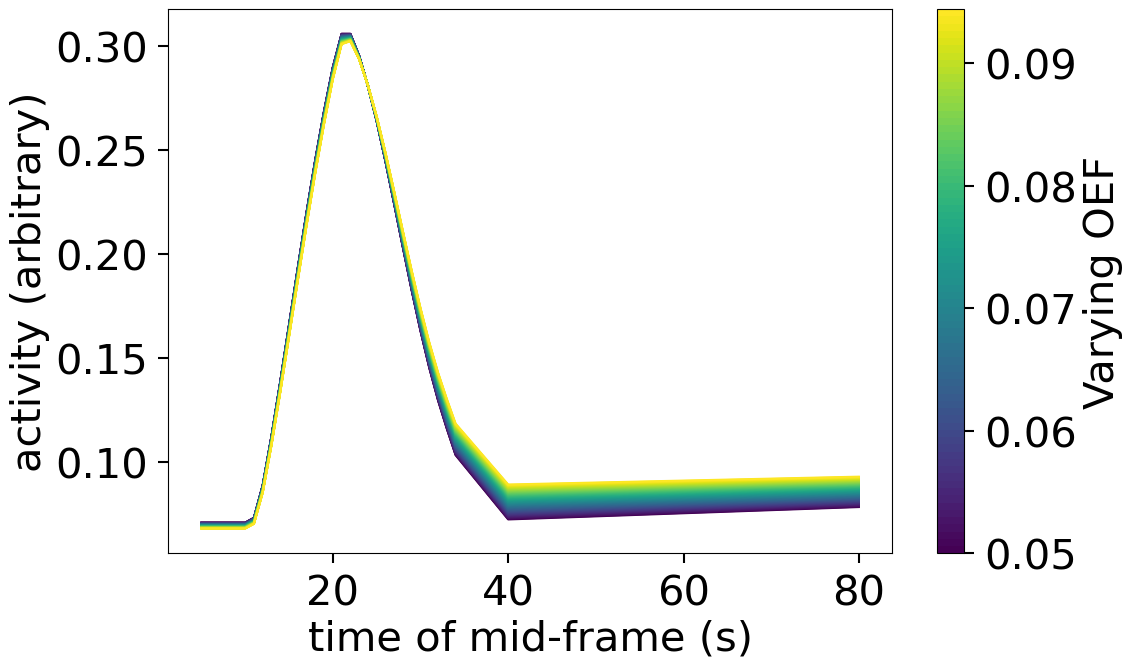

In [33]:
mm_idif.plot_variations(0, 0.05, 0.095 , mm_idif.truths)

Let's sample from this distribution using the default `dynesty` settings with `'slice'`.

iter: 13807 | batch: 18 | bound: 8 | nc: 1 | ncall: 636826 | eff(%):  2.152 | loglstar: 67.468 < 72.326 < 70.716 | logz: 55.004 +/-  0.141 | stop:  0.984                                             

Parameter 0: 0.414 [0.377, 0.447]
Parameter 1: 1.219 [0.307, 1.809]
Parameter 2: 0.981 [0.894, 0.999]
Parameter 3: 15.129 [14.259, 15.906]
Parameter 4: -10.712 [-10.993, -10.351]
Parameter 5: 0.028 [0.022, 0.037]
Parameter 0: 0.414 [0.377, 0.447]
Parameter 1: 1.219 [0.307, 1.809]
Parameter 2: 0.981 [0.894, 0.999]
Parameter 3: 15.129 [14.259, 15.906]
Parameter 4: -10.712 [-10.993, -10.351]
Parameter 5: 0.028 [0.022, 0.037]


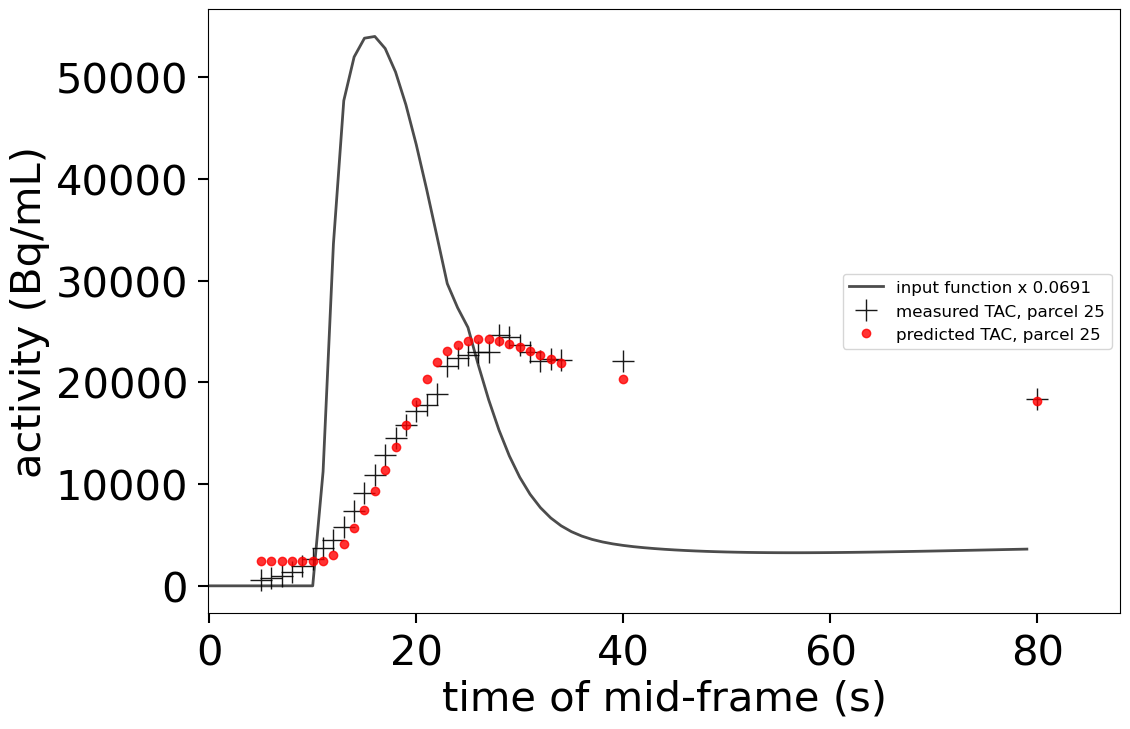

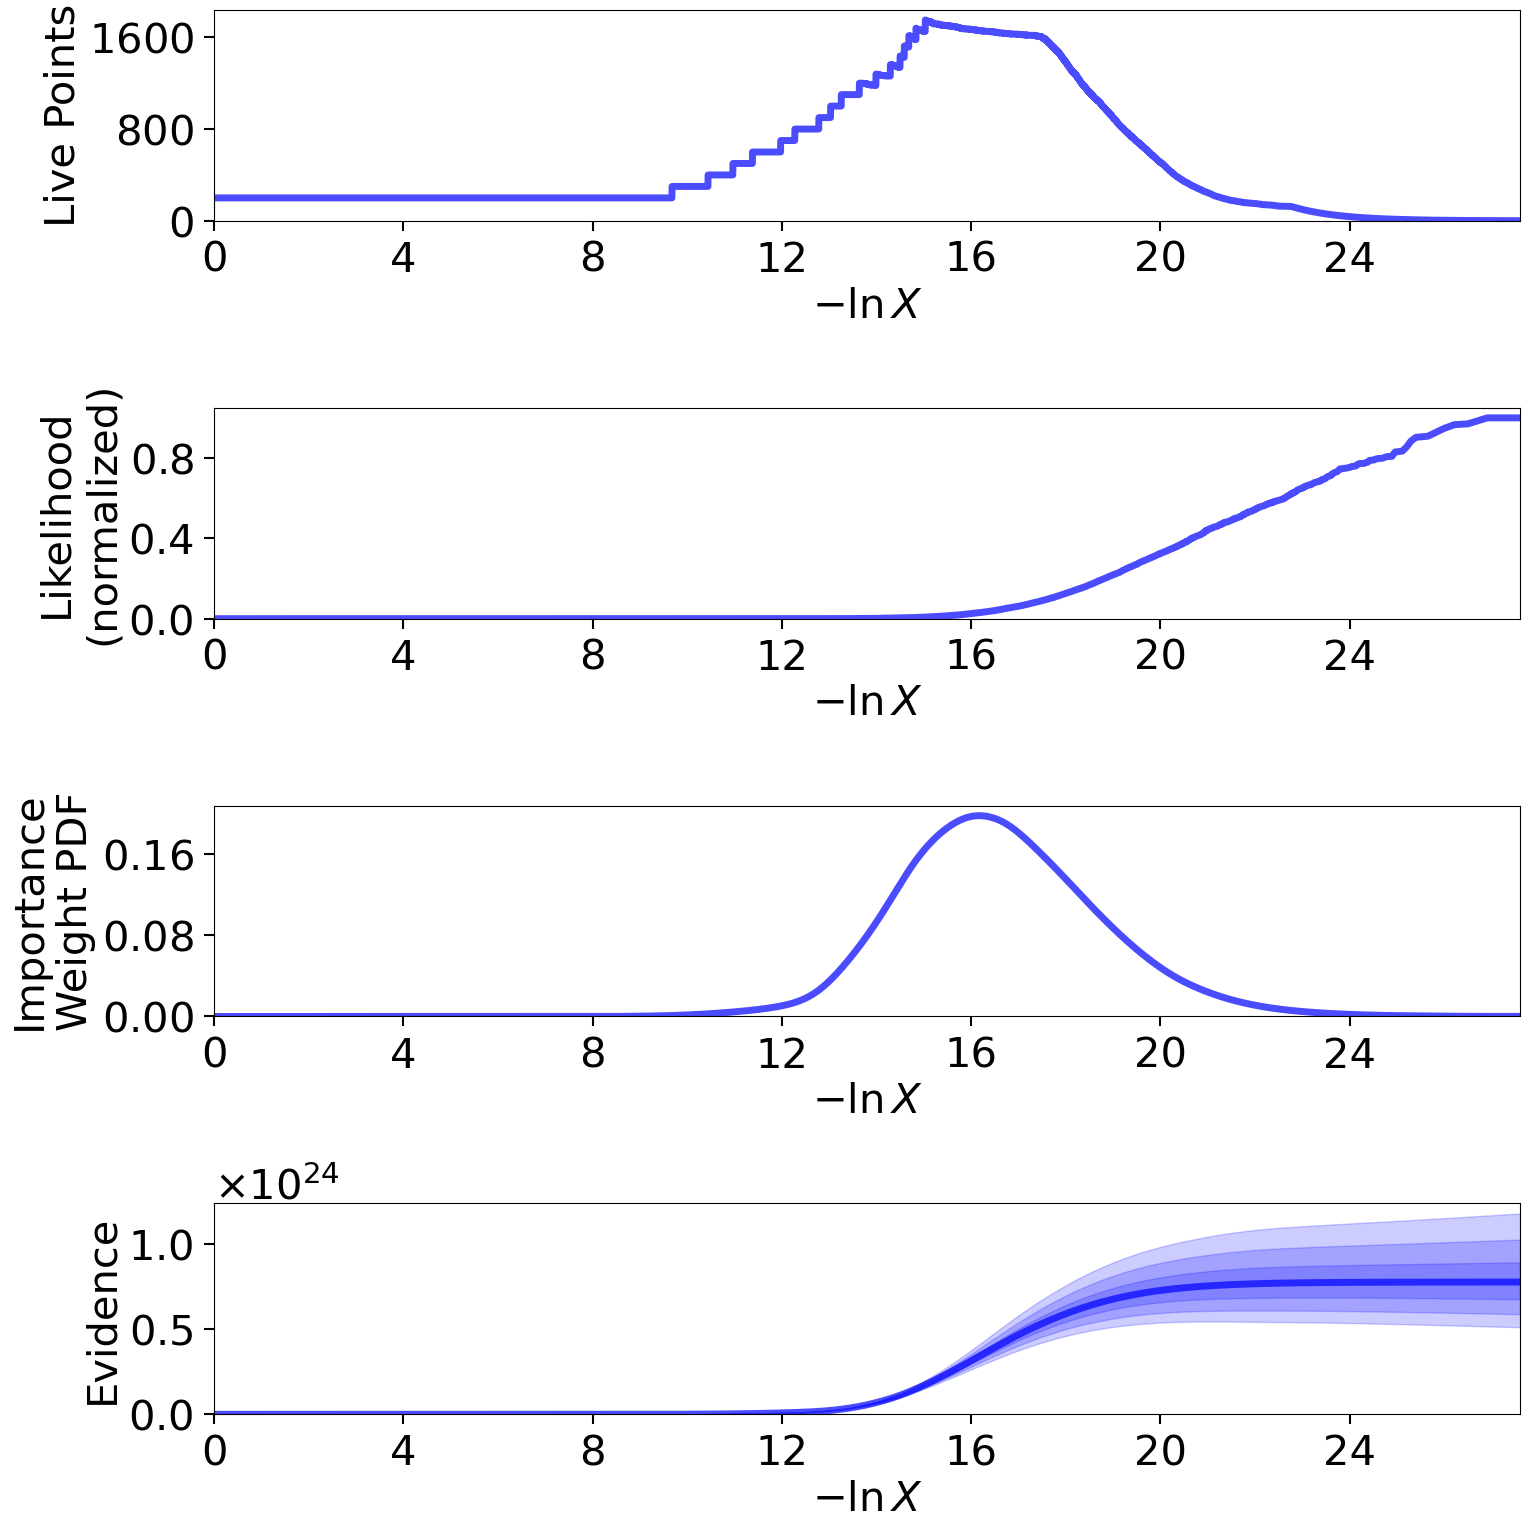

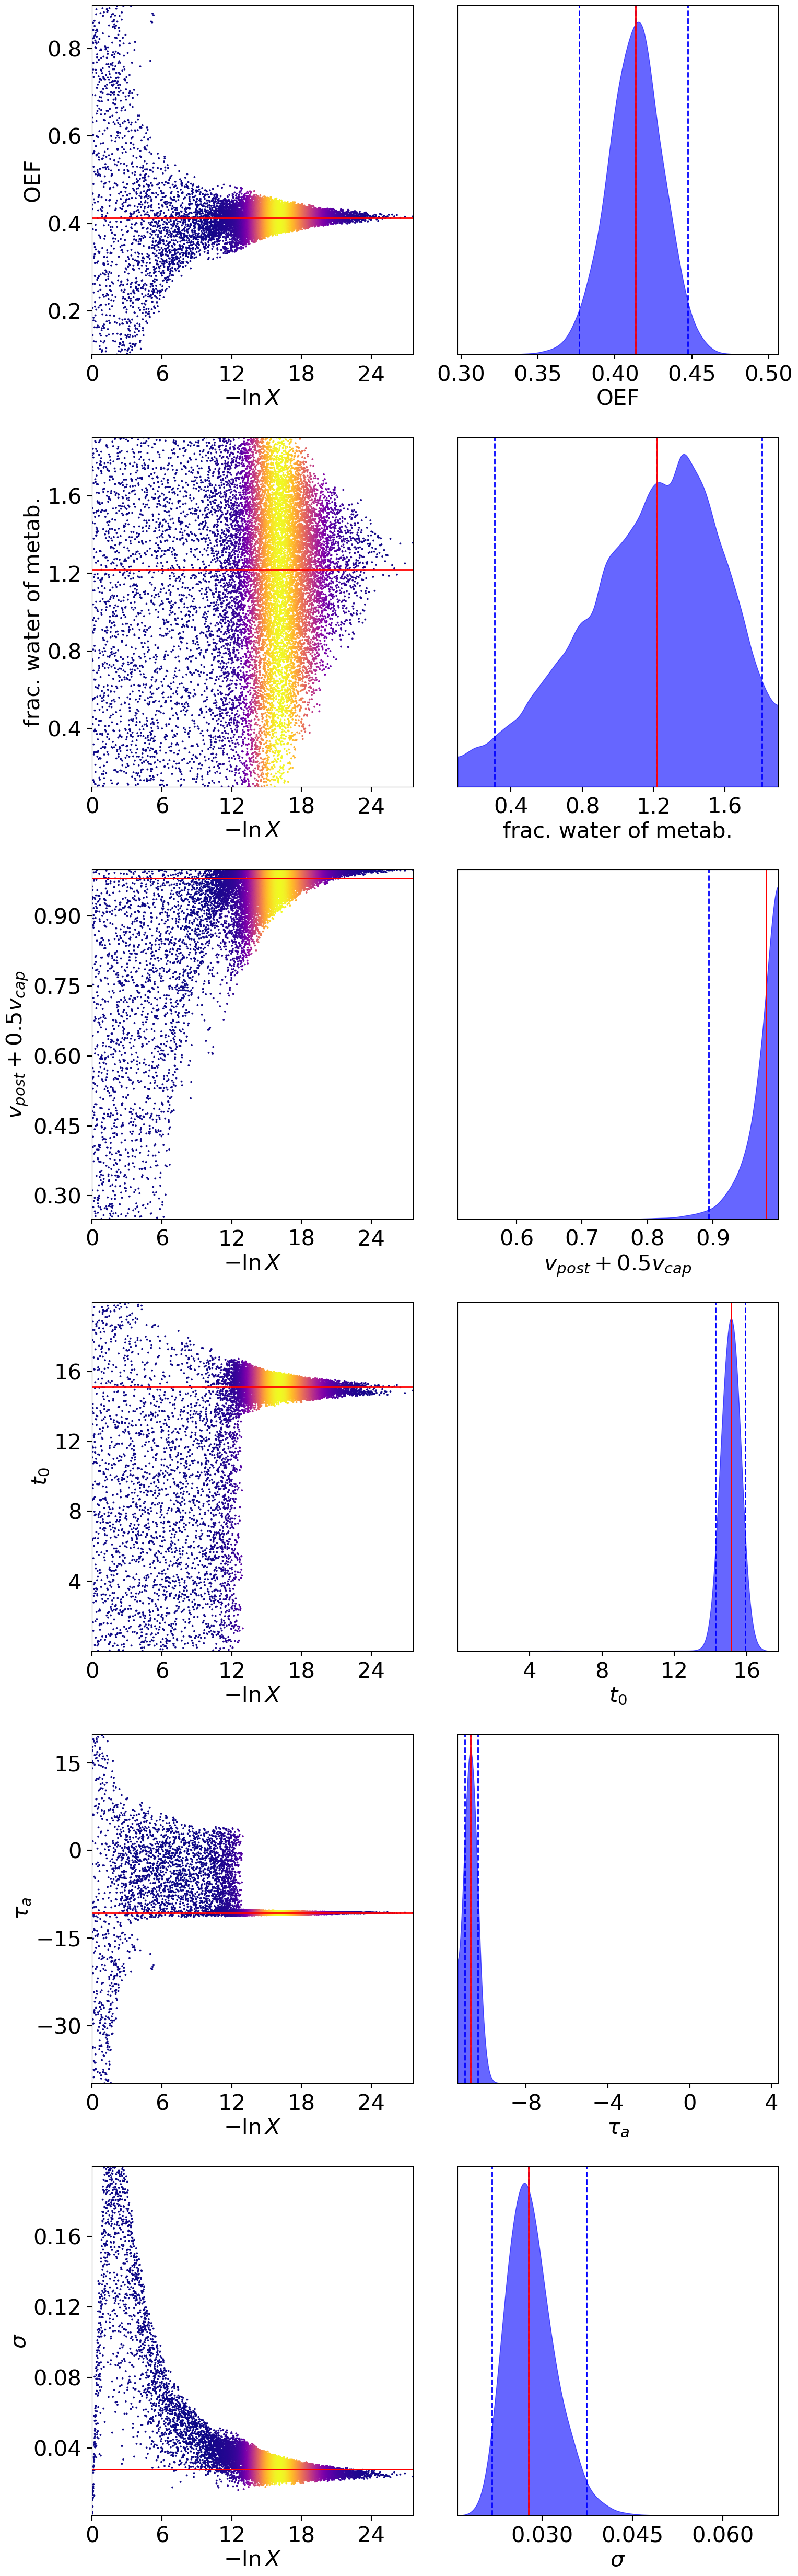

In [34]:
# de novo, thalamus ~ 6, 25
res_idif = mm_idif.run_nested_for_indexed_tac(parc_index, print_progress=True)
mm_idif.save_results(res_idif, "playground-for-M1984M")

# # restart
# sampler = dynesty.DynamicNestedSampler.restore(mm_idif.fqfp+"_dynesty-Boxcar-20240122210738.save")
# sampler.run_nested(resume=True, print_progress=True)
# res = sampler.results